## Question

Use comments to explain your code.

**I.	ice.cream.data.csv contains Ice Cream sales (volume and value sold) for 80 countries for years 2000-2019. Using this data, complete the following tasks:**
1. For our further analysis, we are only interested in Retail Volume in tonnes and Retail Value in US dollars. Subset the data accordingly.
2.	Remove unnecessary columns. Columns to keep: Region, Country, Data Type, Unit, Unit Multiplier and years from 2000 to 2019
3.	Unit Multiplier is the number corresponding to Unit. If Unit is millions then it is 1,000,000, if Thousands (000) - 1,000. Convert volume data to kilograms and value data to US dollars. Then remove Unit and Unit Multiplier columns. 
4.	Convert data to the analysis friendly format shown in the picture below:
 
5.	Rename variables to “Ice Cream Value” and “Ice Cream Volume”
6.	As an additional column, calculate Ice Cream Price.
7.	For each year, calculate total volume by Region. Which is the second largest region by ice cream volumes in 2018?
8.	Try writing a function, which applies step I.7. Make it as general as possible. Using this function calculate:
   + a)What is the third largest Region by Ice Cream Value?
   + b)What is the tenth largest country by Ice Cream Volume?
   + c)Which country had the second largest Ice Cream Price in 2009?

**II.	macro.data.csv contains GDP, Population and Possession of Refrigerator data for 80 countries from 1977 to 2030. Using this data, complete the following tasks:**
1.	Using similar steps as in Ice cream data convert data in to this format:
 
**III.	Combine data:**
1.	Join both data frames and do all the following tasks on this joint data
2.	Subset data to years, which are present in Ice Cream Data. Is this step necessary? Is there something you could have done in previous steps, so that you would not have to do this?
3.	Calculate per capita variables where appropriate.
4.	Visualize the relationship between Ice Cream Volume per Capita and GDP per Capita. Write your visualization to “Output” folder.
5.	Write a function, which calculates percent of missing data for each Country and each Indicator. The result of a function should be easy to read table. Write this table to “Output” folder. 


### I Ice-Cream Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Ice_cream=pd.read_csv('Input/ice.cream.data.csv')
Ice_cream.head()

,Region,Country,CountryID,Industry,Edition,Category,ParentID,Subcategory,ProductID,Lowest Level,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,NaN,29.238692,30.340307,31.797428,33.885975,35.270988,36.555240,37.919347,39.441743,41.215181
1,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
2,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,31.683196,32.468827,33.824007,35.596403,38.052311,39.834793,41.564929,43.443030,45.547622,47.999423
3,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,24.040194,24.672854,25.726400,27.091032,28.971497,30.381223,31.765794,33.267206,34.958683,36.929247
4,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,NaN,291.810762,322.067461,343.112059,353.900998,355.194703,360.004716,368.686758,380.552781,395.036649


In [4]:
Ice_cream.shape

(400, 38)

In [5]:
Ice_cream.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [6]:
Ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               400 non-null    object 
 1   Country              400 non-null    object 
 2   CountryID            400 non-null    int64  
 3   Industry             400 non-null    object 
 4   Edition              400 non-null    int64  
 5   Category             400 non-null    object 
 6   ParentID             400 non-null    int64  
 7   Subcategory          400 non-null    object 
 8   ProductID            400 non-null    int64  
 9   Lowest Level         400 non-null    object 
 10  Modelled             400 non-null    object 
 11  Hierarchy Level      400 non-null    int64  
 12  Data Type            400 non-null    object 
 13  DataTypeID           400 non-null    int64  
 14  Unit                 400 non-null    object 
 15  Unit Multiplier      400 non-null    int

In [7]:
#Check for null value count
Ice_cream.isnull().sum()

Region                   0
Country                  0
CountryID                0
Industry                 0
Edition                  0
Category                 0
ParentID                 0
Subcategory              0
ProductID                0
Lowest Level             0
Modelled                 0
Hierarchy Level          0
Data Type                0
DataTypeID               0
Unit                     0
Unit Multiplier          0
Current/Constant       320
Currency Conversion      0
2000                    14
2001                    12
2002                    12
2003                    12
2004                    10
2005                    10
2006                    10
2007                    10
2008                     8
2009                     8
2010                     6
2011                     2
2012                     2
2013                     2
2014                     0
2015                     0
2016                     0
2017                     0
2018                     0
2

In [8]:
#Descriptive Statistics
Ice_cream.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryID,400.0,280.475000,70.805954,163.000000,215.500000,277.500000,340.250000,408.00000
Edition,400.0,2015.000000,0.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.00000
ParentID,400.0,160660.000000,0.000000,160660.000000,160660.000000,160660.000000,160660.000000,160660.00000
ProductID,400.0,160660.000000,0.000000,160660.000000,160660.000000,160660.000000,160660.000000,160660.00000
Hierarchy Level,400.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
DataTypeID,400.0,447.600000,407.909568,1.000000,3.000000,410.000000,911.000000,913.00000
Unit Multiplier,400.0,600400.000000,490020.960116,1000.000000,1000.000000,1000000.000000,1000000.000000,1000000.00000
2000,386.0,260.564627,901.772408,2.042338,14.976608,40.499228,156.686979,13302.61846
2001,388.0,263.006703,921.436284,2.050652,15.660220,41.823920,156.599134,13834.31979
2002,388.0,272.798273,985.201989,2.090001,16.349676,42.273302,164.127659,15166.28789


In [9]:
#Identify unique values 
for column in Ice_cream.columns:
    unique_values=Ice_cream[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print()

Column 'Region' has 7 unique values:
['Asia Pacific' 'Australasia' 'Eastern Europe' 'Latin America'
 'Middle East and Africa' 'North America' 'Western Europe']

Column 'Country' has 80 unique values:
['Azerbaijan' 'China' 'Hong Kong, China' 'India' 'Indonesia' 'Japan'
 'Kazakhstan' 'Malaysia' 'Pakistan' 'Philippines' 'Singapore'
 'South Korea' 'Taiwan' 'Thailand' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Belarus' 'Bosnia-Herzegovina' 'Bulgaria' 'Croatia'
 'Czech Republic' 'Estonia' 'Georgia' 'Hungary' 'Latvia' 'Lithuania'
 'Macedonia' 'Poland' 'Romania' 'Russia' 'Serbia' 'Slovakia' 'Slovenia'
 'Ukraine' 'Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Mexico' 'Peru' 'Uruguay'
 'Venezuela' 'Algeria' 'Cameroon' 'Egypt' 'Iran' 'Israel' 'Kenya'
 'Morocco' 'Nigeria' 'Saudi Arabia' 'South Africa' 'Tunisia'
 'United Arab Emirates' 'Canada' 'USA' 'Austria' 'Belgium' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Ireland' 'I

In [10]:
#checking whether the data ~ Normal distibution
from scipy.stats import shapiro

# Iterate over each column and perform Shapiro-Wilk test
for column in Ice_cream.columns:
    # Exclude non-numeric columns
    if Ice_cream[column].dtype in ['int64', 'float64']:
        stat, p = shapiro(Ice_cream[column])
        print(f"Column '{column}':")
        print(f"  Shapiro-Wilk Statistic: {stat:.3f}")
        print(f"  p-value: {p:.3f}")
        if p > 0.05:
            print("  Data likely follows a normal distribution (p > 0.05)")
        else:
            print("  Data does not follow a normal distribution (p <= 0.05)")
        print()

Column 'CountryID':
  Shapiro-Wilk Statistic: 0.946
  p-value: 0.000
  Data does not follow a normal distribution (p <= 0.05)

Column 'Edition':
  Shapiro-Wilk Statistic: 1.000
  p-value: 1.000
  Data likely follows a normal distribution (p > 0.05)

Column 'ParentID':
  Shapiro-Wilk Statistic: 1.000
  p-value: 1.000
  Data likely follows a normal distribution (p > 0.05)

Column 'ProductID':
  Shapiro-Wilk Statistic: 1.000
  p-value: 1.000
  Data likely follows a normal distribution (p > 0.05)

Column 'Hierarchy Level':
  Shapiro-Wilk Statistic: 1.000
  p-value: 1.000
  Data likely follows a normal distribution (p > 0.05)

Column 'DataTypeID':
  Shapiro-Wilk Statistic: 0.746
  p-value: 0.000
  Data does not follow a normal distribution (p <= 0.05)

Column 'Unit Multiplier':
  Shapiro-Wilk Statistic: 0.622
  p-value: 0.000
  Data does not follow a normal distribution (p <= 0.05)

Column '2000':
  Shapiro-Wilk Statistic: nan
  p-value: 1.000
  Data likely follows a normal distribution (p 

In [11]:
# Identify numeric variables
numeric_variables=Ice_cream.select_dtypes(include=['int','float']).columns.tolist()

# Categorize numeric variables as discrete or continuous
discrete_variables=[]
continuous_variables=[]

for col in numeric_variables:
    unique_count=Ice_cream[col].nunique()
    if unique_count <=25:  
        discrete_variables.append(col)
    else:
        continuous_variables.append(col)

# Print the categorized variables
print("Discrete Variables:", discrete_variables)
print("Continuous Variables:", continuous_variables)

Discrete Variables: ['Edition', 'ParentID', 'ProductID', 'Hierarchy Level', 'DataTypeID', 'Unit Multiplier']
Continuous Variables: ['CountryID', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [12]:
# Identify categorical variables
categorical_variables=Ice_cream.select_dtypes(include=['object','bool']).columns.tolist()

print("Categorical Variables:", categorical_variables)

Categorical Variables: ['Region', 'Country', 'Industry', 'Category', 'Subcategory', 'Lowest Level', 'Modelled', 'Data Type', 'Unit', 'Current/Constant', 'Currency Conversion']


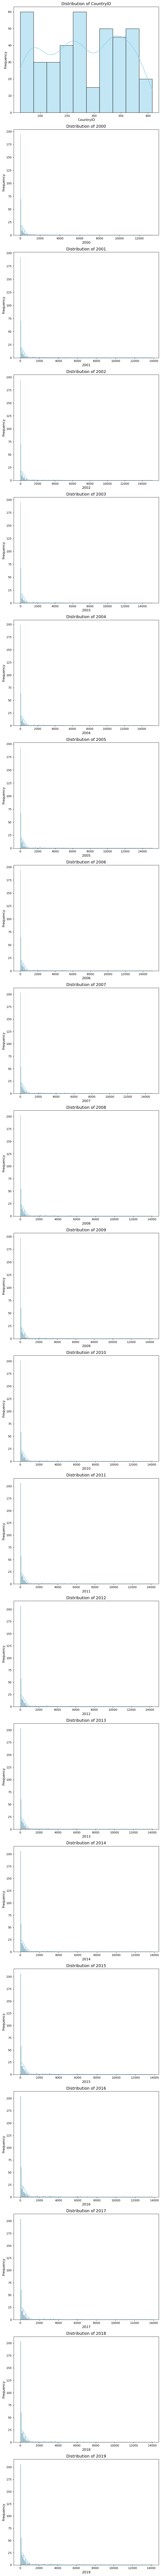

In [13]:
# Distribution plots for continuous columns
fig,axes=plt.subplots(nrows=len(continuous_variables),figsize=(8,6 * len(continuous_variables)))

# Loop through each continuous column and create a distribution plot
for col,ax in zip(continuous_variables,axes):
    sns.histplot(Ice_cream[col],ax=ax,kde=True,color='skyblue')
    ax.set_title(f'Distribution of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Frequency',fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

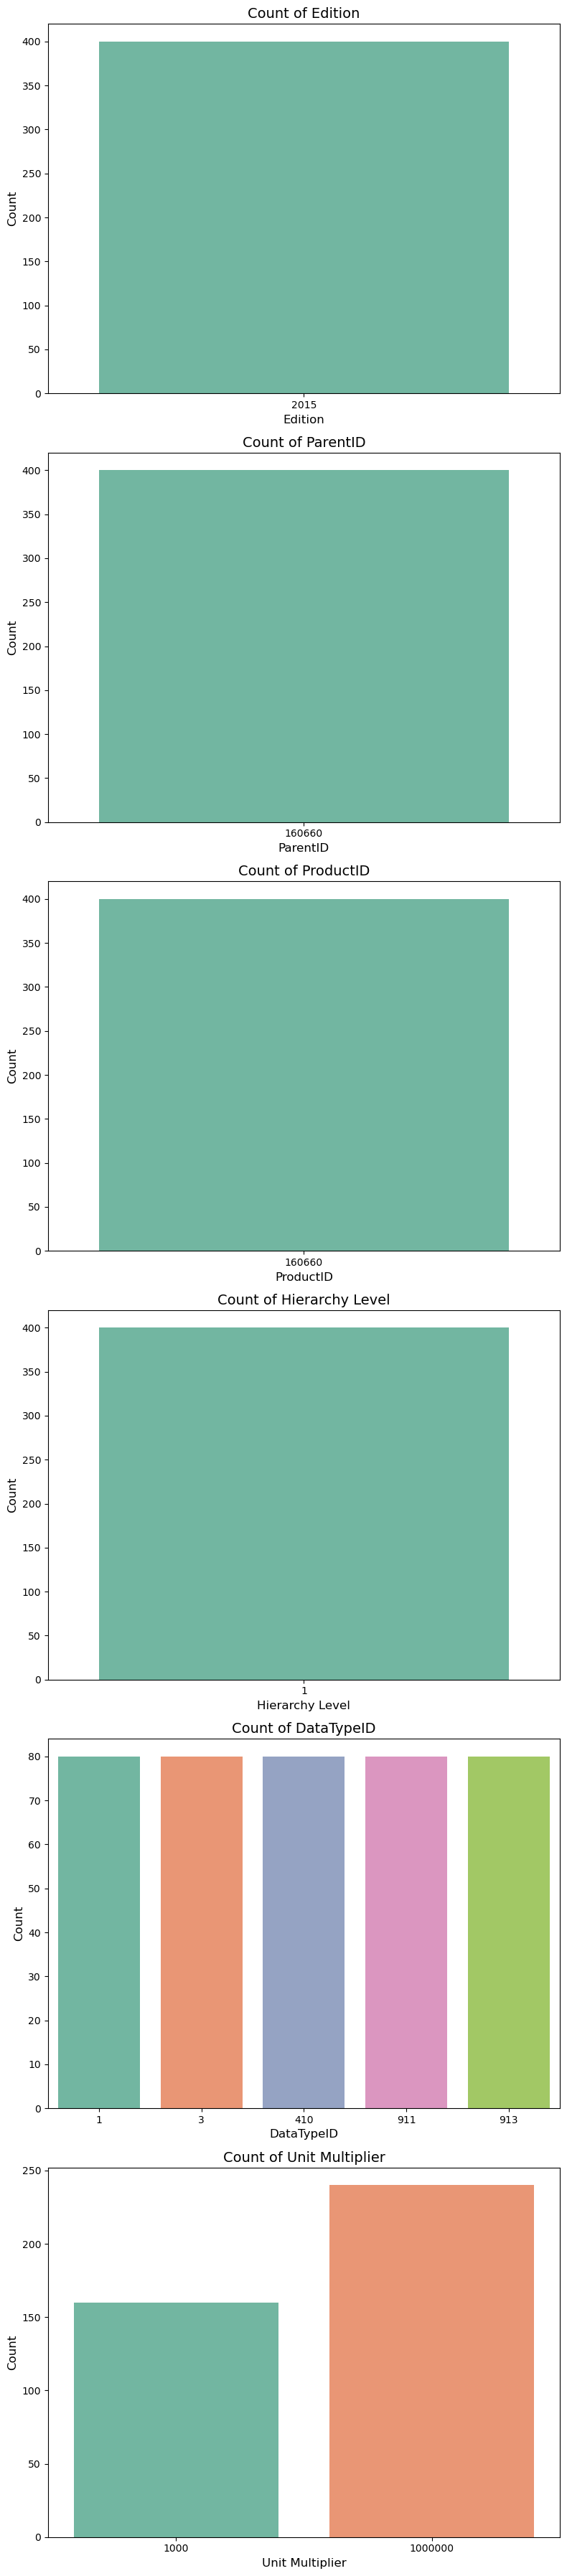

In [14]:
# Plots for discrete columns
fig,axes=plt.subplots(nrows=len(discrete_variables),figsize=(8,6 * len(discrete_variables)))

# Loop through each discrete column and create a count plot
for col,ax in zip(discrete_variables,axes):
    sns.countplot(data=Ice_cream,x=col,ax=ax,palette='Set2')
    ax.set_title(f'Count of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Count',fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

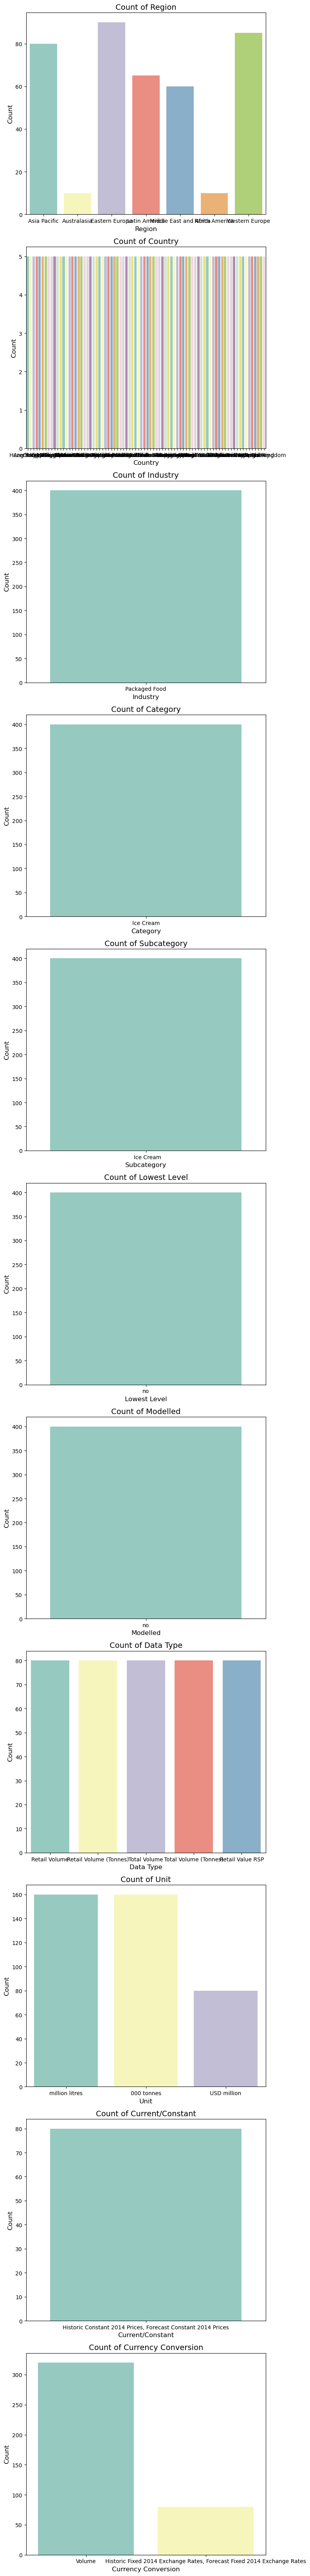

In [15]:
#Plots for categorical columns
fig,axes=plt.subplots(nrows=len(categorical_variables),figsize=(8,6 * len(categorical_variables)))

# Loop through each categorical column and create a count plot
for col,ax in zip(categorical_variables,axes):
    sns.countplot(data=Ice_cream, x=col, ax=ax, palette='Set3')
    ax.set_title(f'Count of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### I(1)

In [16]:
# Filter the dataset to include only 'Retail Volume (Tonnes)' and 'Retail Value RSP'
Subset_icecream=Ice_cream[(Ice_cream['Data Type'] == 'Retail Volume (Tonnes)') | (Ice_cream['Data Type'] == 'Retail Value RSP')]
Subset_icecream.head(3)

,Region,Country,CountryID,Industry,Edition,Category,ParentID,Subcategory,ProductID,Lowest Level,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
4,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,NaN,291.810762,322.067461,343.112059,353.900998,355.194703,360.004716,368.686758,380.552781,395.036649
6,Asia Pacific,China,195,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,2202.080369,2307.703475,2246.740213,2269.596406,2326.098048,2376.110183,2420.433170,2468.486874,2516.706245,2555.051125


In [17]:
print(Subset_icecream['Data Type'].nunique())

2


In [18]:
print(Subset_icecream['Data Type'].unique())

['Retail Volume (Tonnes)' 'Retail Value RSP']


In [19]:
Subset_icecream.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

### I(2)

**Remove unnecessary columns. Columns to keep: Region, Country, Data Type, Unit, Unit Multiplier and years from 2000 to 2019**

In [20]:
Subset_icecream= Subset_icecream[['Region', 'Country', 'Data Type', 'Unit', 'Unit Multiplier'] + 
                                    [str(year) for year in range(2000, 2020)]]


In [21]:
Subset_icecream.columns

Index(['Region', 'Country', 'Data Type', 'Unit', 'Unit Multiplier', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [22]:

Subset_icecream.head(10)

,Region,Country,Data Type,Unit,Unit Multiplier,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Asia Pacific,Azerbaijan,Retail Volume (Tonnes),000 tonnes,1000,13.334554,13.798548,14.340582,15.006165,16.047490,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
4,Asia Pacific,Azerbaijan,Retail Value RSP,USD million,1000000,NaN,NaN,NaN,NaN,NaN,...,NaN,291.810762,322.067461,343.112059,353.900998,355.194703,360.004716,368.686758,380.552781,395.036649
6,Asia Pacific,China,Retail Volume (Tonnes),000 tonnes,1000,1156.620747,1250.799561,1349.642697,1456.487227,1611.014509,...,2202.080369,2307.703475,2246.740213,2269.596406,2326.098048,2376.110183,2420.433170,2468.486874,2516.706245,2555.051125
9,Asia Pacific,China,Retail Value RSP,USD million,1000000,3263.993487,3497.220401,3781.668370,3978.263049,4203.466262,...,5260.920909,5477.981680,5497.833501,5617.095845,5867.056832,6073.451814,6274.253181,6495.483566,6727.898391,6949.242307
11,Asia Pacific,"Hong Kong, China",Retail Volume (Tonnes),000 tonnes,1000,6.954414,6.896404,6.931408,7.124450,7.382796,...,8.386739,8.527428,8.724715,8.894911,9.030801,9.129246,9.204151,9.296824,9.383251,9.462377
14,Asia Pacific,"Hong Kong, China",Retail Value RSP,USD million,1000000,109.382198,109.515471,114.198731,121.280795,126.627639,...,132.133712,129.494363,128.871830,128.976896,131.457344,133.265490,134.767087,136.514965,138.171706,139.728412
16,Asia Pacific,India,Retail Volume (Tonnes),000 tonnes,1000,27.816348,31.096245,34.690343,38.455489,42.568211,...,106.579191,120.990969,135.570580,150.655134,164.599516,180.757982,199.172548,219.497995,241.419946,265.314068
19,Asia Pacific,India,Retail Value RSP,USD million,1000000,176.196358,195.738073,215.545008,235.700334,259.092189,...,473.462595,529.704887,589.819353,636.378891,674.399638,728.829952,789.192043,855.623025,928.342829,1004.756340
21,Asia Pacific,Indonesia,Retail Volume (Tonnes),000 tonnes,1000,31.438430,33.205945,34.985068,36.771028,38.592232,...,44.838271,48.079850,52.103669,57.391889,62.959307,69.360612,76.606776,84.238320,92.402072,101.227384
24,Asia Pacific,Indonesia,Retail Value RSP,USD million,1000000,158.979091,176.289509,190.234208,203.103095,214.985074,...,231.512662,253.255853,284.205421,316.019189,351.049602,391.578979,437.834923,487.867303,542.011514,601.406060


In [23]:
Subset_icecream.isnull().sum()

Region             0
Country            0
Data Type          0
Unit               0
Unit Multiplier    0
2000               7
2001               6
2002               6
2003               6
2004               5
2005               5
2006               5
2007               5
2008               4
2009               4
2010               3
2011               1
2012               1
2013               1
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
dtype: int64

In [24]:
print(Subset_icecream['Unit'].unique())

['000 tonnes' 'USD million']


In [25]:
print(Subset_icecream['Unit Multiplier'].unique())

[   1000 1000000]


### I(3)
**Unit Multiplier is the number corresponding to Unit. If Unit is millions then it is 1,000,000, if Thousands (000) - 1,000. Convert volume data to kilograms and value data to US dollars. Then remove Unit and Unit Multiplier columns.** 

In [26]:
# Define a function to convert volume data from tonnes to kilograms
def convert_volume(row):
    if row['Unit'] == '000 tonnes':
        return row['2000':'2019'] * row['Unit Multiplier'] * 1000
    else:
        return row['2000':'2019']

In [27]:
# Define a function to convert value data from million US dollars to US dollars
def convert_value(row):
    if row['Unit'] == 'USD million':
        return row['2000':'2019'] * row['Unit Multiplier'] * 1000000
    else:
        return row['2000':'2019']

In [28]:
# Apply the conversion functions to the relevant rows
volume_rows = Subset_icecream['Data Type'] == 'Retail Volume (Tonnes)'
value_rows = Subset_icecream['Data Type'] == 'Retail Value RSP'

In [29]:
Subset_icecream.loc[volume_rows, '2000':'2019'] = Subset_icecream[volume_rows].apply(convert_volume, axis=1)
Subset_icecream.loc[value_rows, '2000':'2019'] = Subset_icecream[value_rows].apply(convert_value, axis=1)

In [30]:
Subset_icecream.drop(columns=['Unit', 'Unit Multiplier'], inplace=True)

In [31]:
Subset_icecream.head(3)

,Region,Country,Data Type,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Asia Pacific,Azerbaijan,Retail Volume (Tonnes),1.333455e+07,1.379855e+07,1.434058e+07,1.500617e+07,1.604749e+07,1.689326e+07,1.789393e+07,...,2.101629e+07,2.144272e+07,2.224270e+07,2.329206e+07,2.480516e+07,2.581742e+07,2.675610e+07,2.774352e+07,2.885280e+07,3.014501e+07
4,Asia Pacific,Azerbaijan,Retail Value RSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.918108e+14,3.220675e+14,3.431121e+14,3.539010e+14,3.551947e+14,3.600047e+14,3.686868e+14,3.805528e+14,3.950366e+14
6,Asia Pacific,China,Retail Volume (Tonnes),1.156621e+09,1.250800e+09,1.349643e+09,1.456487e+09,1.611015e+09,1.754241e+09,1.917506e+09,...,2.202080e+09,2.307703e+09,2.246740e+09,2.269596e+09,2.326098e+09,2.376110e+09,2.420433e+09,2.468487e+09,2.516706e+09,2.555051e+09


In [32]:
Subset_icecream.columns

Index(['Region', 'Country', 'Data Type', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

### I(4)
**Convert data to the analysis friendly format shown in the picture**

In [33]:
# Split 'Data Type' column into two separate columns
volume_data=Subset_icecream[Subset_icecream['Data Type'] == 'Retail Volume (Tonnes)'].drop('Data Type', axis=1)
value_data=Subset_icecream[Subset_icecream['Data Type'] == 'Retail Value RSP'].drop('Data Type', axis=1)

# Reshape the DataFrame to have 'Region', 'Country', 'Year', 'Retail Value RSP', "Retail Volume' columns
volume_data=volume_data.melt(id_vars=['Region', 'Country'], var_name='Year', value_name='Retail Volume')
value_data= value_data.melt(id_vars=['Region', 'Country'], var_name='Year', value_name='Retail Value RSP')

# Merge volume and value DataFrames
final_data=volume_data.merge(value_data, on=['Region', 'Country', 'Year'])

final_data.head()

,Region,Country,Year,Retail Volume,Retail Value RSP
0,Asia Pacific,Azerbaijan,2000,1.333455e+07,NaN
1,Asia Pacific,China,2000,1.156621e+09,3.263993e+15
2,Asia Pacific,"Hong Kong, China",2000,6.954414e+06,1.093822e+14
3,Asia Pacific,India,2000,2.781635e+07,1.761964e+14
4,Asia Pacific,Indonesia,2000,3.143843e+07,1.589791e+14


### I(5)
**Rename variables to “Ice Cream Value” and “Ice Cream Volume”**

In [34]:
# Rename columns
final_data.rename(columns={'Retail Volume': 'Ice Cream Volume', 'Retail Value RSP': 'Ice Cream Value'}, inplace=True)

In [35]:
final_data.columns

Index(['Region', 'Country', 'Year', 'Ice Cream Volume', 'Ice Cream Value'], dtype='object')

### I(6)
**As an additional column, calculate Ice Cream Price.**

In [36]:
# Calculate Ice Cream Price
final_data['Ice Cream Price']=final_data['Ice Cream Value'] / final_data['Ice Cream Volume']

final_data.head()

,Region,Country,Year,Ice Cream Volume,Ice Cream Value,Ice Cream Price
0,Asia Pacific,Azerbaijan,2000,1.333455e+07,NaN,NaN
1,Asia Pacific,China,2000,1.156621e+09,3.263993e+15,2.822008e+06
2,Asia Pacific,"Hong Kong, China",2000,6.954414e+06,1.093822e+14,1.572846e+07
3,Asia Pacific,India,2000,2.781635e+07,1.761964e+14,6.334274e+06
4,Asia Pacific,Indonesia,2000,3.143843e+07,1.589791e+14,5.056839e+06


In [37]:
final_data.shape

(1600, 6)

### I(7)

**For each year, calculate total volume by Region. Which is the second largest region by ice cream volumes in 2018?**

In [38]:
# Group by Year and Region, then calculate total volume by region for each year
total_volume_by_region=final_data.groupby(['Year', 'Region'])['Ice Cream Volume'].sum().reset_index()


print(total_volume_by_region)


     Year                  Region  Ice Cream Volume
0    2000            Asia Pacific      2.104757e+09
1    2000             Australasia      1.817983e+08
2    2000          Eastern Europe      5.952718e+08
3    2000           Latin America      4.704668e+08
4    2000  Middle East and Africa      3.280442e+08
..    ...                     ...               ...
135  2019          Eastern Europe      8.314351e+08
136  2019           Latin America      9.934569e+08
137  2019  Middle East and Africa      7.247255e+08
138  2019           North America      2.837279e+09
139  2019          Western Europe      2.127326e+09

[140 rows x 3 columns]


In [39]:
# Filter for the year 2018
volume_2018=total_volume_by_region[total_volume_by_region['Year'] == '2018']

In [40]:
# Find the second largest region by ice cream volumes in 2018
second_largest_region_2018= volume_2018.nlargest(2, 'Ice Cream Volume').iloc[1]

print("Second largest region by ice cream volumes in 2018:")
print(second_largest_region_2018)

Second largest region by ice cream volumes in 2018:
Year                         2018
Region              North America
Ice Cream Volume     2828540693.4
Name: 131, dtype: object


### I(8)
**Try writing a function, which applies step I.7. Make it as general as possible. Using this function calculate:**
+ a)	What is the third largest Region by Ice Cream Value?
+ b)	What is the tenth largest country by Ice Cream Volume?
+ c)	Which country had the second largest Ice Cream Price in 2009?

In [41]:
def calculate_largest_by_year(final_data, column_name, year):
    # Group by Year and Region, then calculate total volume by region for each year
    total_by_region=final_data[final_data['Year'] == str(year)].groupby(['Year', 'Region'])[column_name].sum().reset_index()
    
    # Find the second largest region
    second_largest_region=total_by_region.nlargest(2, column_name).iloc[1]
    
    return second_largest_region['Region']

In [42]:
# a) What is the third largest Region by Ice Cream Value?
third_largest_region_by_value= calculate_largest_by_year(final_data, 'Ice Cream Value', 2018)
print("Third largest Region by Ice Cream Value:", third_largest_region_by_value)

Third largest Region by Ice Cream Value: Asia Pacific


In [43]:
# b) What is the tenth largest country by Ice Cream Volume?
tenth_largest_country_by_volume = calculate_largest_by_year(final_data, 'Ice Cream Volume', 2018)
print("Tenth largest country by Ice Cream Volume:", tenth_largest_country_by_volume)

Tenth largest country by Ice Cream Volume: North America


In [44]:
# c) Which country had the second largest Ice Cream Price in 2009?
second_largest_country_by_price_2009 = calculate_largest_by_year(final_data, 'Ice Cream Price', 2009)
print("Country with the second largest Ice Cream Price in 2009:", second_largest_country_by_price_2009)

Country with the second largest Ice Cream Price in 2009: Eastern Europe


### II Macro Data

In [45]:
Macro=pd.read_csv('Input/macro.data.csv')
Macro.head()

,Region,Country,CountryID,Industry,Edition,Category,ParentID,Subcategory,ProductID,Lowest Level,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Asia Pacific,Azerbaijan,163,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,1.013374e+05,1.055003e+05,1.098343e+05,1.143463e+05,1.190436e+05,1.239339e+05,1.290251e+05,1.343255e+05,1.398436e+05,1.455884e+05
1,Asia Pacific,China,195,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,1.572255e+07,1.666598e+07,1.766592e+07,1.872588e+07,1.984943e+07,2.104040e+07,2.230282e+07,2.364099e+07,2.505945e+07,2.656302e+07
2,Asia Pacific,"Hong Kong, China",259,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,3.553615e+05,3.670885e+05,3.792024e+05,3.917161e+05,4.046427e+05,4.179959e+05,4.317898e+05,4.460389e+05,4.607581e+05,4.759632e+05
3,Asia Pacific,India,265,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,3.208204e+06,3.426360e+06,3.659353e+06,3.908189e+06,4.173946e+06,4.457774e+06,4.760902e+06,5.084644e+06,5.430400e+06,5.799667e+06
4,Asia Pacific,Indonesia,263,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,1.331538e+06,1.404773e+06,1.482036e+06,1.563548e+06,1.649543e+06,1.740267e+06,1.835982e+06,1.936961e+06,2.043494e+06,2.155886e+06


In [46]:
Macro.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')

In [47]:
Macro.shape

(240, 72)

In [48]:
Macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               240 non-null    object 
 1   Country              240 non-null    object 
 2   CountryID            240 non-null    int64  
 3   Industry             240 non-null    object 
 4   Edition              240 non-null    int64  
 5   Category             240 non-null    object 
 6   ParentID             240 non-null    int64  
 7   Subcategory          240 non-null    object 
 8   ProductID            240 non-null    int64  
 9   Lowest Level         240 non-null    object 
 10  Modelled             240 non-null    object 
 11  Hierarchy Level      240 non-null    int64  
 12  Data Type            240 non-null    object 
 13  DataTypeID           240 non-null    int64  
 14  Unit                 240 non-null    object 
 15  Unit Multiplier      240 non-null    int

In [49]:
Macro.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryID,240.0,280.475000,7.086518e+01,163.000000,215.500000,277.500000,340.250000,408.00
Edition,240.0,2014.000000,0.000000e+00,2014.000000,2014.000000,2014.000000,2014.000000,2014.00
ParentID,240.0,11210.666667,1.363132e+04,1552.000000,1552.000000,1632.000000,30448.000000,30448.00
ProductID,240.0,1898.666667,4.330028e+02,1554.000000,1554.000000,1634.000000,2508.000000,2508.00
Hierarchy Level,240.0,0.666667,4.723897e-01,0.000000,0.000000,1.000000,1.000000,1.00
...,...,...,...,...,...,...,...,...
2026,240.0,489370.122417,2.148081e+06,10.907520,99.771935,19302.002025,236162.910875,23533073.35
2027,240.0,505665.896037,2.231956e+06,10.993990,99.780185,19426.525160,241733.509575,24119848.47
2028,240.0,522666.458252,2.320579e+06,11.071683,99.796207,19546.616115,247403.476150,24721468.35
2029,240.0,540408.380132,2.414261e+06,11.141157,99.809585,19662.605095,253174.797500,25338306.07


In [50]:
#Identify unique values 
for column in Macro.columns:
    unique_values=Macro[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print()

Column 'Region' has 7 unique values:
['Asia Pacific' 'Australasia' 'Eastern Europe' 'Latin America'
 'Middle East and Africa' 'North America' 'Western Europe']

Column 'Country' has 80 unique values:
['Azerbaijan' 'China' 'Hong Kong, China' 'India' 'Indonesia' 'Japan'
 'Kazakhstan' 'Malaysia' 'Pakistan' 'Philippines' 'Singapore'
 'South Korea' 'Taiwan' 'Thailand' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Belarus' 'Bosnia-Herzegovina' 'Bulgaria' 'Croatia'
 'Czech Republic' 'Estonia' 'Georgia' 'Hungary' 'Latvia' 'Lithuania'
 'Macedonia' 'Poland' 'Romania' 'Russia' 'Serbia' 'Slovakia' 'Slovenia'
 'Ukraine' 'Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Mexico' 'Peru' 'Uruguay'
 'Venezuela' 'Algeria' 'Cameroon' 'Egypt' 'Iran' 'Israel' 'Kenya'
 'Morocco' 'Nigeria' 'Saudi Arabia' 'South Africa' 'Tunisia'
 'United Arab Emirates' 'Canada' 'USA' 'Austria' 'Belgium' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Ireland' 'I

In [51]:
# Identify numeric variables
numeric_variables=Macro.select_dtypes(include=['int','float']).columns.tolist()

# Categorize numeric variables as discrete or continuous
discrete_variables=[]
continuous_variables=[]

for col in numeric_variables:
    unique_count=Macro[col].nunique()
    if unique_count <=25:  
        discrete_variables.append(col)
    else:
        continuous_variables.append(col)

# Print the categorized variables
print("Discrete Variables:", discrete_variables)
print("Continuous Variables:", continuous_variables)

Discrete Variables: ['Edition', 'ParentID', 'ProductID', 'Hierarchy Level', 'DataTypeID', 'Unit Multiplier']
Continuous Variables: ['CountryID', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']


In [52]:
# Identify categorical variables
categorical_variables=Macro.select_dtypes(include=['object','bool']).columns.tolist()

print("Categorical Variables:", categorical_variables)

Categorical Variables: ['Region', 'Country', 'Industry', 'Category', 'Subcategory', 'Lowest Level', 'Modelled', 'Data Type', 'Unit', 'Current/Constant', 'Currency Conversion']


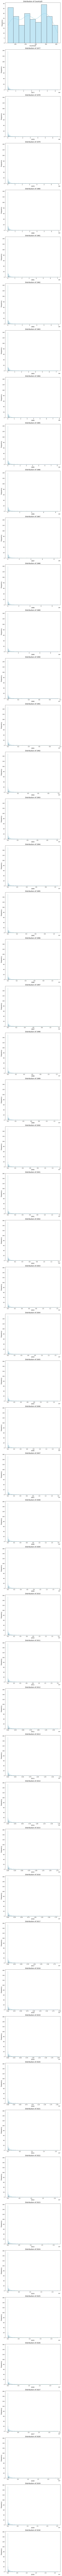

In [53]:
# Distribution plots for continuous columns
fig,axes=plt.subplots(nrows=len(continuous_variables),figsize=(8,6 * len(continuous_variables)))

# Loop through each continuous column and create a distribution plot
for col,ax in zip(continuous_variables,axes):
    sns.histplot(Macro[col],ax=ax,kde=True,color='skyblue')
    ax.set_title(f'Distribution of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Frequency',fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
Macro.drop(columns=['Edition', 'ParentID', 'ProductID', 'Hierarchy Level', 'DataTypeID', 'Unit Multiplier','CountryID','Lowest Level', 'Modelled', 'Data Type', 'Unit', 'Current/Constant', 'Currency Conversion','Industry', 'Category'], inplace=True)

In [55]:
Macro.columns

Index(['Region', 'Country', 'Subcategory', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028', '2029', '2030'],
      dtype='object')

In [56]:
# Split 'Subcategory ' column into three separate columns
GDP_data=Macro[Macro['Subcategory'] =='  Total GDP'].drop('Subcategory', axis=1)
refri_data=Macro[Macro['Subcategory'] =='  Possession of Refrigerator'].drop('Subcategory', axis=1)
pop_data=Macro[Macro['Subcategory'] =='Population: National Estimates at January 1st'].drop('Subcategory', axis=1)

# Reshape the DataFrame to have 'Region', 'Country', 'Year', 'Possession of Refrigerator', 'GDP','Population' columns
GDP_data=GDP_data.melt(id_vars=['Region', 'Country'], var_name='Year', value_name='GDP')
refri_data= refri_data.melt(id_vars=['Region', 'Country'], var_name='Year', value_name='Possession of Refrigerator')
pop_data=pop_data.melt(id_vars=['Region', 'Country'], var_name='Year', value_name='Population')

In [57]:
# Merge GDP_data, refri_data, and pop_data
merged_data=GDP_data.merge(refri_data,on=['Region', 'Country', 'Year'])
final_macro_data = pd.merge(merged_data, pop_data, on=['Region', 'Country', 'Year'])

# Display the merged DataFrame
final_macro_data.head()

,Region,Country,Year,GDP,Possession of Refrigerator,Population
0,Asia Pacific,Azerbaijan,1977,NaN,58.294193,5828.300
1,Asia Pacific,China,1977,324287.15050,0.663533,937170.000
2,Asia Pacific,"Hong Kong, China",1977,44929.90188,75.800000,4583.700
3,Asia Pacific,India,1977,254198.81870,0.459646,623869.826
4,Asia Pacific,Indonesia,1977,138042.39820,0.880000,140688.052


In [58]:
final_macro_data.shape

(4320, 6)

### III Combined Data

### III(1)

**Join both data frames and do all the following tasks on this joint data**

In [59]:
#Join both data frames based on a common identifier
combined_data=pd.merge(final_data, final_macro_data, on=['Country', 'Year','Region'])

In [60]:
combined_data.head()

,Region,Country,Year,Ice Cream Volume,Ice Cream Value,Ice Cream Price,GDP,Possession of Refrigerator,Population
0,Asia Pacific,Azerbaijan,2000,1.333455e+07,NaN,NaN,1.748362e+04,89.000000,8032.800
1,Asia Pacific,China,2000,1.156621e+09,3.263993e+15,2.822008e+06,2.758412e+06,40.597764,1257860.000
2,Asia Pacific,"Hong Kong, China",2000,6.954414e+06,1.093822e+14,1.572846e+07,1.687075e+05,96.000000,6665.000
3,Asia Pacific,India,2000,2.781635e+07,1.761964e+14,6.334274e+06,7.893116e+05,9.170400,1010209.628
4,Asia Pacific,Indonesia,2000,3.143843e+07,1.589791e+14,5.056839e+06,4.358993e+05,15.300000,213395.411


In [61]:
combined_data.columns

Index(['Region', 'Country', 'Year', 'Ice Cream Volume', 'Ice Cream Value',
       'Ice Cream Price', 'GDP', 'Possession of Refrigerator', 'Population'],
      dtype='object')

### III(2)

**Subset data to years present in Ice Cream Data**

In [62]:
#This step may not be necessary if the merging process already filters out unnecessary years.
#So we can check is the years in ice cream data is present in combined data.

# Check unique years in the ice cream data
ice_cream_years = final_data['Year'].unique()

# Check if all unique years from the ice cream data are present in the merged dataframe
all_ice_cream_years_present = all(year in combined_data['Year'].unique() for year in ice_cream_years)

if all_ice_cream_years_present:
    print("All years present in the ice cream data are also present in the merged dataframe.")
else:
    print("Not all years present in the ice cream data are present in the merged dataframe.")


All years present in the ice cream data are also present in the merged dataframe.


### III(3)

**Calculate per capita variables where appropriate.**

In [63]:
# Calculate per capita variables
combined_data['GDP_per_capita'] = combined_data['GDP'] / combined_data['Population']
combined_data['Refrigerator_per_capita'] = combined_data['Possession of Refrigerator'] / combined_data['Population']

combined_data['Ice_Cream_Volume_per_capita'] = combined_data['Ice Cream Volume'] / combined_data['Population']
combined_data['Ice_Cream_Value_per_capita'] = combined_data['Ice Cream Value'] / combined_data['Population']

In [64]:
combined_data.head(3)

,Region,Country,Year,Ice Cream Volume,Ice Cream Value,Ice Cream Price,GDP,Possession of Refrigerator,Population,GDP_per_capita,Refrigerator_per_capita,Ice_Cream_Volume_per_capita,Ice_Cream_Value_per_capita
0,Asia Pacific,Azerbaijan,2000,1.333455e+07,NaN,NaN,1.748362e+04,89.000000,8032.8,2.176528,0.011080,1660.013159,NaN
1,Asia Pacific,China,2000,1.156621e+09,3.263993e+15,2.822008e+06,2.758412e+06,40.597764,1257860.0,2.192941,0.000032,919.514689,2.594878e+09
2,Asia Pacific,"Hong Kong, China",2000,6.954414e+06,1.093822e+14,1.572846e+07,1.687075e+05,96.000000,6665.0,25.312460,0.014404,1043.422930,1.641143e+10


### III(4)

**Visualize the relationship between Ice Cream Volume per Capita and GDP per Capita.**

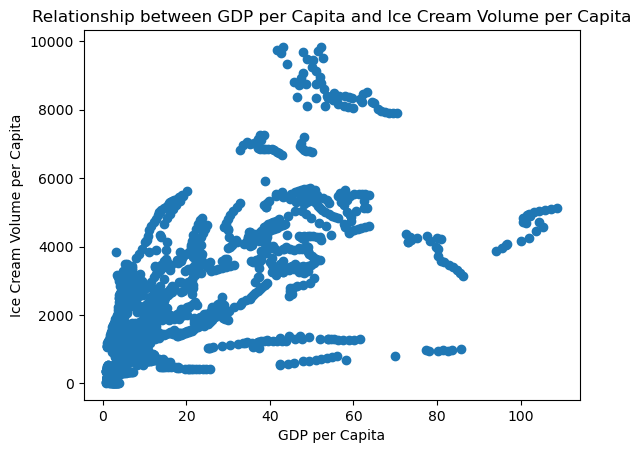

In [65]:
plt.scatter(combined_data['GDP_per_capita'], combined_data['Ice_Cream_Volume_per_capita'])
plt.xlabel('GDP per Capita')
plt.ylabel('Ice Cream Volume per Capita')
plt.title('Relationship between GDP per Capita and Ice Cream Volume per Capita')
plt.savefig("Output/ice_cream_vs_gdp_per_capita.png")  # Save the plot to "Output" folder
plt.show()

### III(5)

**Write a function, which calculates percent of missing data for each Country and each Indicator.**

In [66]:
# function to calculate percent of missing data for each column
def calculate_missing_data_percent(data):
    missing_data_percent = data.isnull().mean() * 100
    return missing_data_percent

# Apply the function to combined data
missing_data_percentage_in_columns = calculate_missing_data_percent(combined_data)

# Save the missing data percentage to a CSV file
missing_data_percentage_in_columns.to_csv("Output/missing_data_percentage_in_columns.csv")

# Display the missing data percentage
print("Missing Data Percentage:")
print(missing_data_percentage_in_columns)

Missing Data Percentage:
Region                         0.0000
Country                        0.0000
Year                           0.0000
Ice Cream Volume               0.0000
Ice Cream Value                3.6875
Ice Cream Price                3.6875
GDP                            0.0000
Possession of Refrigerator     0.0000
Population                     0.0000
GDP_per_capita                 0.0000
Refrigerator_per_capita        0.0000
Ice_Cream_Volume_per_capita    0.0000
Ice_Cream_Value_per_capita     3.6875
dtype: float64


In [67]:
#function to calculate percent of missing data for each country
def calculate_missing_data_percentage(data):
    # Initialize an empty DataFrame to store the results
    missing_data_percentages = pd.DataFrame(columns=['Country', 'Indicator', 'Missing Data Percentage'])

    # Iterate over each indicator
    for indicator in data.columns:
        if indicator not in ['Country', 'Year']:  # Exclude non-indicator columns
            # Iterate over each country
            for country in data['Country'].unique():
                # Calculate the percentage of missing data for the current indicator and country
                missing_data_percentage = data[data['Country'] == country][indicator].isnull().mean() * 100
                # Append the results to the DataFrame
                missing_data_percentages = missing_data_percentages.append({
                    'Country': country,
                    'Indicator': indicator,
                    'Missing Data Percentage': missing_data_percentage
                }, ignore_index=True)

    return missing_data_percentages

# Apply the function to combined data
missing_data_percentage = calculate_missing_data_percentage(combined_data)

# Save the missing data percentage to a CSV file
missing_data_percentage.to_csv("Output/missing_data_percentage.csv")

# Display the result
print("Missing Data Percentage:")
print(missing_data_percentage)


Missing Data Percentage:
              Country                   Indicator  Missing Data Percentage
0          Azerbaijan                      Region                      0.0
1               China                      Region                      0.0
2    Hong Kong, China                      Region                      0.0
3               India                      Region                      0.0
4           Indonesia                      Region                      0.0
..                ...                         ...                      ...
875             Spain  Ice_Cream_Value_per_capita                      0.0
876            Sweden  Ice_Cream_Value_per_capita                      0.0
877       Switzerland  Ice_Cream_Value_per_capita                      0.0
878            Turkey  Ice_Cream_Value_per_capita                      0.0
879    United Kingdom  Ice_Cream_Value_per_capita                      0.0

[880 rows x 3 columns]
